Load the Data (7/2013-6/2016)

In [2]:
import csv
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',  1005)
pd.set_option('display.max_columns', 30)

citi_data = pd.read_csv('master_data_file.csv', nrows = 1000, encoding = 'utf-8')
days_graph = pd.read_csv('day_rides_array_formatted.csv', encoding = 'utf-8')
top_20_routes_graph = pd.read_csv('top_20_routes_sub_formatted.csv', encoding = 'utf-8')
top_10_starts_graph = pd.read_csv('top_10_starts_sub_formatted.csv', encoding = 'utf-8')
top_10_ends_graph = pd.read_csv('top_10_ends_sub_formatted.csv', encoding = 'utf-8')
#polygons = pd.read_csv('neighborhood.txt', nrows = 1000, sep = ' ')
#citi_data = pd.read_csv('201606-citibike-tripdata.csv', encoding = 'utf-8')
#citi_data.to_csv('100k_citi_data.csv')

In [ ]:
#for x in range(0, len(citi_data)):
#    if citi_data['gender'][x] != 2 and citi_data['gender'][x] != 1 and citi_data['gender'][x] != 0:
#        print(citi_data['gender'][x])

#citi_data.columns
#if citi_data['tripduration'] == 2854 and citi_data['gender'] == 2:
#    print
#print(citi_data['start station latitude'][0])
#bottom = citi_data.tail(10000)
#bottom
# for x in range(0, len(citi_data)):
#     if citi_data['tripduration'][x] == 'tripduration':
#         citi_data.drop['tripduration'][x]

Rider Demographics - Gender (complete and save in output folder)

In [ ]:
kv_duration = []
for x in range(0, len(citi_data)):
    if citi_data['usertype'][x] == 'Subscriber' and citi_data['gender'][x] != 0:
        key = citi_data['gender'][x]
        value1 = citi_data['tripduration'][x]
        kv = ("%s\t%d" %  (key, value1))
        kv_duration.append(kv)
        
kv_duration.sort()

total_subscribers = len(kv_duration)

keys_duration = []
values_duration = []
for i in kv_duration:
    key, value = i.split('\t')
    keys_duration.append(key)
    value = int(value)
    values_duration.append(value)

key_place = 0
first_key = 0
count = 0
sum_duration = 0
avg_duration = 0
count_hold = 0

for j in keys_duration:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        avg_duration = (sum_duration / count) / 60
        male_percent = (count / total_subscribers)*100
        print("Average Trip Duration for Male Riders: %.2f minutes" % (avg_duration))
        print("The percentage of subscribers that are Male is: %.2f percent" % (male_percent))
        key_place = j
        sum_duration = values_duration[count_hold]
        avg_duration = 0
        count = 1
        count_hold += 1
    else:
        sum_duration += values_duration[count_hold]
        count_hold += 1
        count += 1
avg_duration = (sum_duration / count) / 60 
female_percent = (count / total_subscribers)*100
print("Average Trip Duration for Female Riders: %.2f minutes" % (avg_duration))
print("The percentage of subscribers that are Female is: %.2f percent" % (female_percent))
# print('{}{}'.format("Number of Female Riders: ", female_count))
# print('{}{}'.format("Number of Male Riders: ",  male_count))
# print('{}{}{}'.format("Average Trip Duration for Females: ",  female_avg_duration, " Minutes"))
# print('{}{}{}'.format("Average Trip Duration for Males: ",  male_avg_duration, " Minutes"))

Rider Demographics - Age (Complete and saved to output file)

In [ ]:
kv_age = []
for x in range(0, len(citi_data)):
    if citi_data['usertype'][x] == 'Subscriber' and citi_data['birth year'][x] != " " and citi_data['gender'][x] != 0:
        key = citi_data['gender'][x]
        birth_year = citi_data['birth year'][x]
        birth_year = int(birth_year)
        curr_year = 2018
        age = curr_year - birth_year
        value1 = age
        kv = ("%s\t%d" % (key, value1))
        kv_age.append(kv)
        
kv_age.sort()

keys_age = []
values_age = []
for i in kv_age:
    key, value = i.split('\t')
    keys_age.append(key)
    value = int(value)
    values_age.append(value)

key_place = 0
first_key = 0
count = 0
sum_age = 0
avg_age = 0
count_hold = 0

for j in keys_age:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        avg_age = (sum_age / count)
        print("Average Age for Male Riders: %.2f" % (avg_age))
        key_place = j
        sum_age = values_age[count_hold]
        avg_age = 0
        count = 1
        count_hold += 1
    else:
        sum_age += values_age[count_hold]
        count_hold += 1
        count += 1
avg_age = (sum_age / count)        
print("Average Age for Female Riders: %.2f" % (avg_age))

# print('{}{}'.format("Number of Female Riders: ", female_count))
# print('{}{}'.format("Number of Male Riders: ",  male_count))
# print('{}{}{}'.format("Average Trip Duration for Females: ",  female_avg_duration, " Minutes"))
# print('{}{}{}'.format("Average Trip Duration for Males: ",  male_avg_duration, " Minutes"))

Distance Calculation from Lat Longs By Gender (complete and saved to output file)

In [ ]:
import math
kv_distance = []
same_station = 0 
total = 0 
 
for x in range(0, len(citi_data)): 
    total += 1
    if citi_data['usertype'][x] == 'Subscriber' and citi_data['gender'][x] != 0:
        if citi_data['start station id'][x] == citi_data['end station id'][x]:
            same_station += 1
        else:
            key = citi_data['gender'][x]
            value1 = citi_data['start station latitude'][x]
            value2 = citi_data['start station longitude'][x]
            value3 = citi_data['end station latitude'][x]
            value4 = citi_data['end station longitude'][x]
            kv = ("%s\t%s,%s,%s,%s" % (key, value1, value2, value3, value4))
            kv_distance.append(kv)

kv_distance.sort()

keys_distance = []
lat_start_val = []
long_start_val = []
lat_end_val = []
long_end_val = []
for i in kv_distance:
    key, value = i.split('\t')
    keys_distance.append(key)
    lat_start, long_start, lat_end, long_end = value.split(',')
    lat_start = float(lat_start)
    long_start = float(long_start)
    lat_end = float(lat_end)
    long_end = float(long_end)
    lat_start_val.append(lat_start)
    long_start_val.append(long_start)
    lat_end_val.append(lat_end)
    long_end_val.append(long_end)
sum_distance = 0
count = 0
count_hold = 0
def distance(lat_start, long_start, lat_end, long_end):
        lat1 = lat_start
        lat2 = lat_end
        long1 = long_start
        long2 = long_end
        radius = 3959
    
        dlat = math.radians(lat2-lat1)
        dlong = math.radians(long2-long1)
        a= math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong/2) * math.sin(dlong/2)
        c = 2* math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c
        return d

key_place = 0
first_key = 0
count = 0
sum_distance = 0
count_hold = 0

for j in keys_distance:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        avg_distance = sum_distance / count
        print("Average Trip Distance for Male Riders: %.2f miles" % (avg_distance))
        key_place = j
        distance_vals = distance(lat_start_val[count_hold], long_start_val[count_hold], lat_end_val[count_hold], long_end_val[count_hold])
        count = 1
        sum_distance = distance_vals
        avg_distance = 0
        count_hold += 1
    else:
        distance_vals = distance(lat_start_val[count_hold], long_start_val[count_hold], lat_end_val[count_hold], long_end_val[count_hold])       
        sum_distance += distance_vals
        count += 1
        count_hold += 1

avg_distance = sum_distance / count
print("Average Trip Distance for Female Riders: %.2f miles" % (avg_distance))
print("The number of trips that began and ended at the same station for subscribers was: %d out of %d trips"  % (same_station, total))

Distance Calculation from Lat Longs By UserType (complete and saved to output files)

In [ ]:
import math
kv_distance_user = []
for x in range(0, len(citi_data)):
    if citi_data[start station id][x] == citi_data[end station id][x]:
        dummy = 1
        else:
            if citi_data['usertype'][x] == "Subscriber":
                key = "Subscriber"
                value1 = citi_data['start station latitude'][x]
                value2 = citi_data['start station longitude'][x]
                value3 = citi_data['end station latitude'][x]
                value4 = citi_data['end station longitude'][x]
                value5 = citi_data['tripduration'][x]
                kv = ("%s\t%s,%s,%s,%s" % (key, value1, value2, value3, value4))
                kv_distance_user.append(kv)
            else:
                key = "Customer"
                value1 = citi_data['start station latitude'][x]
                value2 = citi_data['start station longitude'][x]
                value3 = citi_data['end station latitude'][x]
                value4 = citi_data['end station longitude'][x]
                value5 = citi_data['tripduration'][x]
                kv = ("%s\t%s,%s,%s,%s" % (key, value1, value2, value3, value4))
                kv_distance_user.append(kv)
kv_distance_user.sort()

keys_distance_user = []
lat_start_val_user = []
long_start_val_user = []
lat_end_val_user = []
long_end_val_user = []
for i in kv_distance_user:
    key, value = i.split('\t')
    keys_distance_user.append(key)
    lat_start, long_start, lat_end, long_end = value.split(',')
    lat_start = float(lat_start)
    long_start = float(long_start)
    lat_end = float(lat_end)
    long_end = float(long_end)
    lat_start_val_user.append(lat_start)
    long_start_val_user.append(long_start)
    lat_end_val_user.append(lat_end)
    long_end_val_user.append(long_end)

def distance(lat_start, long_start, lat_end, long_end):
        lat1 = lat_start
        lat2 = lat_end
        long1 = long_start
        long2 = long_end
        radius = 3959
    
        dlat = math.radians(lat2-lat1)
        dlong = math.radians(long2-long1)
        a= math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong/2) * math.sin(dlong/2)
        c = 2* math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c
        return d

key_place = 0
first_key = 0
count = 0
sum_distance = 0
count_hold = 0

for j in keys_distance_user:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        avg_distance = sum_distance / count
        print("Average Trip Distance for Non-Subscribers: %.2f miles" % (avg_distance))
        key_place = j
        distance_vals = distance(lat_start_val_user[count_hold], long_start_val_user[count_hold], lat_end_val_user[count_hold], long_end_val_user[count_hold])
        count = 1
        sum_distance = distance_vals
        avg_distance = 0
        count_hold += 1
        
    else:
        distance_vals = distance(lat_start_val_user[count_hold], long_start_val_user[count_hold], lat_end_val_user[count_hold], long_end_val_user[count_hold])       
        sum_distance += distance_vals
        count += 1
        count_hold += 1

avg_distance = sum_distance / count
print("Average Trip Distance for Subscribers: %.2f miles" % (avg_distance))

Top Ten and Bottom Ten Start/End Station Combos (complete and saved to output files)

In [ ]:
kv_stations = []
for x in range(0, len(citi_data)):
        key1 = citi_data['start station name'][x]
        key2 = citi_data['end station name'][x]
        value1 = 1
        kv = ("%s to %s\t%d" % (key1, key2, value1))
        kv_stations.append(kv)
        
kv_stations.sort()

keys_stations = []

for i in kv_stations:
    key, value = i.split('\t')
    keys_stations.append(key)

key_place = 0
first_key = 0
count = 0
new_kv =[]

for j in keys_stations:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        kv = (count, key_place)
        new_kv.append(kv)
        key_place = j
        count = 1
    else:
        count += 1
kv = (count, key_place)
new_kv.append(kv)
new_kv.sort(reverse = True)
top_ten = []
bottom_ten = []
count_place = 1
for x in range(0,10):
    top_ten.append(new_kv[x])
for y in top_ten:
    key_final= y[1]
    value_final = y[0]
    print("The %d most popular route is: %s with %d trips" % (count_place, key_final, value_final))
    count_place +=1
new_kv.sort()
count_place = 1
for x in range(0,10):
    bottom_ten.append(new_kv[x])
for y in bottom_ten:
    key_final = y[1]
    value_final = y[0]
    print("The %d least popular route is: %s with %d trips" % (count_place, key_final, value_final))
    count_place +=1

Top Routes for Subscribers Vs Customers (complete and saved to output files)

In [ ]:
kv_stations_utype = []
for x in range(0, len(citi_data)):
        key1 = citi_data['usertype'][x]
        key2 = citi_data['start station name'][x]
        key3 = citi_data['end station name'][x]
        value1 = 1
        kv = ("%s,%s to %s\t%d" % (key1, key2, key3, value1))
        kv_stations_utype.append(kv)
        
kv_stations_utype.sort()

keys_stations_utype = []
key_utype_list = []
key_station_type_list = []
for i in kv_stations_utype:
    key, value = i.split('\t')
    keys_stations_utype.append(key)
key_place = 0
first_key = 0
count = 0
new_kv_customer =[]
new_kv_subscriber = []
for j in keys_stations_utype:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        if key_place[0:2] == "Cu":
            kv = (count, key_place)
            new_kv_customer.append(kv)
            key_place = j
            count = 1
        else:
            kv = (count, key_place)
            new_kv_subscriber.append(kv)
            key_place = j
            count = 1
    else:
        count += 1
if key_place[0:2] == "Cu":
            kv = (count, key_place)
            new_kv_customer.append(kv)
else:
    kv = (count, key_place)
    new_kv_subscriber.append(kv) 
def ranking(array, order, top_or_bottom):
    array.sort(reverse = order)
    top_ten = []
    bottom_ten = []
    count_place = 1
    for x in range(0,10):
        top_ten.append(array[x])
    for y in top_ten:
        key_final = y[1]
        value_final = y[0]
        key_utype , key_station = key_final.split(",")
        print("The %d %s popular route for a %s is: %s with %d trips" % (count_place, top_or_bottom, key_utype, key_station, value_final))
        count_place +=1
ranking(new_kv_subscriber, True, "most")
ranking(new_kv_customer, True, "most")
ranking(new_kv_subscriber, False, "least")
ranking(new_kv_subscriber, False, "least")

In [ ]:
Most Popular End Stations, Most Popular Start Stations (complete, saved to output files)

In [ ]:
kv_end_stations_utype = []
for x in range(0, len(citi_data)):
        key1 = citi_data['usertype'][x]
        #key2 = citi_data['start station name'][x]
        key2 = citi_data['end station name'][x]
        value1 = 1
        kv = ("%s,%s\t%d" % (key1, key2, value1))
        kv_end_stations_utype.append(kv)
        
kv_end_stations_utype.sort()
keys_end_stations_utype = []
key_end_utype_list = []
key_end_station_type_list = []
for i in kv_end_stations_utype:
    key, value = i.split('\t')
    keys_end_stations_utype.append(key)

key_place = 0
first_key = 0
count = 0
new_kv_end_customer =[]
new_kv_end_subscriber = []
for j in keys_end_stations_utype:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        if key_place[0:2] == "Cu":
            kv = (count, key_place)
            new_kv_end_customer.append(kv)
            key_place = j
            count = 1
        else:
            kv = (count, key_place)
            new_kv_end_subscriber.append(kv)
            key_place = j
            count = 1
    else:
        count += 1
if key_place[0:2] == "Cu":
            kv = (count, key_place)
            new_kv_end_customer.append(kv)
else:
    kv = (count, key_place)
    new_kv_end_subscriber.append(kv) 
def ranking(array, order, top_or_bottom):
    array.sort(reverse = order)
    top_ten = []
    bottom_ten = []
    count_place = 1
    for x in range(0,10):
        top_ten.append(array[x])
    for y in top_ten:
        key_final = y[1]
        value_final = y[0]
        key_end_utype , key_end_station = key_final.split(",")
        print("The %d %s popular end station for a %s is: %s with %d trips" % (count_place, top_or_bottom, key_end_utype, key_end_station, value_final))
        count_place +=1
ranking(new_kv_end_subscriber, True, "most")
ranking(new_kv_end_customer, True, "most")
ranking(new_kv_end_subscriber, False, "least")
ranking(new_kv_end_subscriber, False, "least")

Number of Trips Where Start and End Station Are the Same (complete and saved to output files)

In [ ]:
kv_same_stations = []
for x in range(0, len(citi_data)):
        key1 = citi_data['usertype'][x]
        value1 = citi_data['start station name'][x]
        value2 = citi_data['end station name'][x]
        value3 = citi_data['tripduration'][x]
        value4 = 1
        kv = ("%s\t%s,%s,%d,%d" % (key1, value1, value2, value3, value4))
        kv_same_stations.append(kv)
        
kv_same_stations.sort()
start_stations = []
end_stations = []
trip_duration = []
keys_utype_list = []
for i in kv_same_stations:
    key, value = i.split('\t')
    start, end, duration, value = value.split(",")
    keys_utype_list.append(key)
    start_stations.append(start)
    end_stations.append(end)
    duration = int(duration)
    trip_duration.append(duration)

key_place = 0
first_key = 0
same_count = 0
diff_count = 0
sum_duration_diff = 0
sum_duration_same = 0
count_place = 0
new_key = 0
for j in keys_utype_list:
    if first_key == 0:
        key_place = j
        first_key = 1
    if j != key_place and first_key != 0:
        avg_duration_same = (sum_duration_same / same_count) / 60
        avg_duration_diff = (sum_duration_diff / diff_count) / 60
        print("The Number of Trips for a %s that began and ended at the same station is: %d. The average duration of those trips was %.2f, compared to %.2f for non-same station trips" % (key_place, same_count, avg_duration_same, avg_duration_diff))
        key_place = j
        same_count = 0
        diff_count = 0
        if end_stations[count_place] == start_stations[count_place]:
            sum_duration_same = trip_duration[count_place]
            same_count += 1
            count_place += 1
            sum_duration_diff = 0
        else:
            sum_duration_diff = trip_duration[count_place]
            diff_count += 1
            count_place += 1
            sum_duration_same = 0
    else:
        if end_stations[count_place] == start_stations[count_place]:
            same_count += 1
            sum_duration_same += trip_duration[count_place]
            count_place += 1
        else:
            diff_count += 1
            sum_duration_diff += trip_duration[count_place]
            count_place += 1

avg_duration_same = (sum_duration_same / same_count) / 60
avg_duration_diff = (sum_duration_diff / diff_count) / 60
print("The Number of Trips for a %s that began and ended at the same station is: %d. The average duration of those trips was %.2f, compared to %.2f for non-same station trips" % (key_place, same_count, avg_duration_same, avg_duration_diff))

Seasonality - Number of Trips By Month (complete and saved to output files)

In [ ]:
kv_months = []
for x in range(0, len(citi_data)):
        key = citi_data['starttime'][x][5:7]
        value1 = 1
        kv = ("%s\t%s" % (key, value1))
        kv_months.append(kv)
        
kv_months.sort()

keys_months = []

for i in kv_months:
    key, value = i.split('\t')
    keys_months.append(key)

key_place = 0
first_key = 0
count = 0

for j in keys_months:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        print("The number of rides in %s were: %d" % (key_place, count))
        key_place = j
        count = 1
    else:
        count += 1
print("The number of rides in %s were: %d" % (key_place, count))

Seasonality - The Number of Trips in Good Weather Months (May - Sept) Vs Bad Weather Months (complete and saved to output files)

In [ ]:
kv_weather = []
for x in range(0, len(citi_data)):
        if citi_data['starttime'][x][5:7] == "05" or citi_data['starttime'][x][5:7] =="06" or citi_data['starttime'][x][5:7] =="07" or citi_data['starttime'][x][5:7] =="08" or citi_data['starttime'][x][5:7] =="09":
            key = "Summer"
        else:
            key = "Winter"
        value1 = 1
        kv = ("%s\t%s" % (key, value1))
        kv_weather.append(kv)
        
kv_weather.sort()

keys_weather = []

for i in kv_weather:
    key, value = i.split('\t')
    keys_weather.append(key)

key_place = 0
first_key = 0
count = 0

for j in keys_weather:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        print("The number of rides in %s were: %d" % (key_place, count))
        key_place = j
        count = 1
    else:
        count += 1
print("The number of rides in %s were: %d" % (key_place, count))

Seasonality - Types of Riders in Good Weather Vs Bad Weather (complete and saved to output files)

In [ ]:
kv_weather_riders = []
for x in range(0, len(citi_data)):
        if citi_data['starttime'][x][5:7] == "05" or citi_data['starttime'][x][5:7] =="06" or citi_data['starttime'][x][5:7] =="07" or citi_data['starttime'][x][5:7] =="08" or citi_data['starttime'][x][5:7] =="09":
            key1 = "Summer"
        else:
            key1 = "Winter"
        if citi_data['usertype'][x] == "Subscriber":
            key2 = "Subscriber"
        else:
            key2 = "Customer"
        value1 = 1
        kv = ("%s,%s\t%s" % (key1, key2, value1))
        kv_weather_riders.append(kv)
        
kv_weather_riders.sort()

keys_weather_riders = []

for i in kv_weather_riders:
    key, value = i.split('\t')
    keys_weather_riders.append(key)

key_place = 0
first_key = 0
count = 0

for j in keys_weather_riders:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        new_key1, new_key2 = key_place.split(",")
        print("The number of %s rides in %s were: %d" % (new_key2, new_key1, count))
        key_place = j
        count = 1
    else:
        count += 1
new_key1, new_key2 = key_place.split(",")
print("The number of %s rides in %s were: %d" % (new_key2, new_key1, count))

Trips By Year (Complete and saved to output files)

In [ ]:
kv_years = []
for x in range(0, len(citi_data)):
        if citi_data['starttime'][x][0:4] == "2013":
            key1 = "Year 1"
        if citi_data['starttime'][x][0:4] == "2014" and int(citi_data['starttime'][x][5:7])<=6:
            key1 = "Year 1"
        if citi_data['starttime'][x][0:4] == "2014" and int(citi_data['starttime'][x][5:7])>6:
            key1 = "Year 2"
        if citi_data['starttime'][x][0:4] == "2015" and int(citi_data['starttime'][x][5:7])<=6:
            key1 = "Year 2"
        else:
            key1 = "Year 3"
        value1 = 1
        kv = ("%s\t%s" % (key1, value1))
        kv_years.append(kv)
        
kv_years.sort()

keys_years = []

for i in kv_years:
    key, value = i.split('\t')
    keys_years.append(key)

key_place = 0
first_key = 0
count = 0

for j in keys_years:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        print("The number of riders in %s were: %d" % (key_place, sum_riders))
        key_place = j
        sum_riders = 1
    else:
        sum_riders += 1

print("The number of riders in %s  were: %d" % (key_place, sum_riders))

Weekday Vs Weekend

In [ ]:
import datetime
kv_weekend = []
for x in range(0, len(citi_data)):    
    key1 = citi_data['usertype'][x]
    year = int(citi_data['starttime'][x][0:4])
    month = int(citi_data['starttime'][x][5:7])
    day = int(citi_data['starttime'][x][8:10])
    week_num = datetime.date(year, month, day).weekday()
    if week_num <= 4:
        key2 = "Weekday"
    else:
        key2 = "Weekend"
    value1 = 1
    kv = ("%s,%s\t%d" % (key1, key2, value1))
    kv_weekend.append(kv)
kv_weekend.sort()

keys_weekend = []
for i in kv_weekend:
    key, value = i.split('\t')
    keys_weekend.append(key)

key_place = 0
first_key = 0
count = 0
for j in keys_weekend:
    if first_key == 0:
        key_place = j
        first_key = 1 
    
    if j != key_place and first_key != 0:
        key_user_type, key_day_type = key_place.split(",")
        if key_place[0:2] == "Cu":
            if key_day_type == "Weekday":
                avg_trips = count / 5
                print("The total number and average number of weekday trips for a Customer are: %d and %.2f" % (count, avg_trips))
            else:
                avg_trips = count / 2
                print("The total number and average number of weekend trips for a Customer is: %d and %.2f" % (count, avg_trips))
            key_place = j
            count = 1
        else:
            if key_day_type == "Weekday":
                avg_trips = count / 5
                print("The total number and average number of weekday trips for a Subscriber is: %d and %.2f" % (count, avg_trips))
            else:
                avg_trips = count / 2
                print("The total number and average number of weekend trips for a Subscriber is: %d and %.2f" % (count, avg_trips))
            key_place = j
            count = 1
    else:
        count += 1
key_user_type, key_day_type = key_place.split(",")
if key_place[0:2] == "Cu":
        if key_day_type == "Weekday":
            avg_trips = count / 5
            print("The total number and average number of weekday trips for a Customer is: %d and %.2f" % (count, avg_trips))
        else:
            avg_trips = count / 2
            print("The total number and average number of weekend trips for a Customer is: %d and %.2f" % (count, avg_trips))
else:
    if key_day_type == "Weekday":
        avg_trips = count / 5
        print("The total number and average number of weekday trips for a Subscriber is: %d and %.2f" % (count, avg_trips))
    else: 
        avg_trips = count / 2
        print("The total number and average number of weekend trips for a Subscriber is: %d and %.2f" % (count, avg_trips))

Visiualizing Ridership Per Day

In [ ]:
import matplotlib.pyplot as plt
days_list =  [] 
counts_list = []

for x in range(0, len(days_graph)):
    temp = days_graph['Days'][x]
    temp1 = days_graph['Counts'][x]
    temp = temp.strip("'")
    temp = temp.strip(" ")
    temp = temp.strip("'")
    days_list.append(temp)
    counts_list.append(temp1)
#counts_collect_y = days_graph.iloc[:,1:].values

N = len(counts_list)
x = range(N)
plt.figure(figsize=(55,40))
plt.title("Day Rider Counts",fontsize=30)
plt.bar(x, counts_list, color="b", align="center",width=0.3)
plt.xticks(range(len(days_list)),days_list[0:],rotation='vertical',fontsize=10)
plt.ylabel("Day Counts",fontsize=25) 
plt.xlabel("Number of Rides", fontsize = 25) 
plt.savefig('plot',bbox_inches= 'tight') 
plt.show()

Visualizing Top 20 Subscriber Route Combos

In [ ]:
import matplotlib.pyplot as plt
routes_list =  [] 
counts_list = []

for x in range(0, len(top_20_routes_graph)):
    temp = top_20_routes_graph['Routes'][x]
    temp1 = top_20_routes_graph['Counts'][x]
    temp = temp.strip("'")
    temp = temp.strip(" ")
    temp = temp.strip("'")
    routes_list.append(temp)
    counts_list.append(temp1)
#counts_collect_y = days_graph.iloc[:,1:].values

N = len(counts_list)
x = range(N)
plt.figure(figsize=(50,20))
plt.title("Top 20 Route Combos",fontsize=70)
plt.bar(x, counts_list, color="b", align="center",width=0.3)
plt.xticks(range(len(routes_list)),routes_list[0:],rotation='vertical',fontsize=35)
plt.yticks(fontsize=35)
plt.ylabel("Number of Rides",fontsize=45) 
plt.xlabel("Start/ End Station", fontsize = 45) 
plt.savefig('top_20_route_combos',bbox_inches= 'tight') 
plt.show()

Visualizing Top 10 Subscriber Start Stations

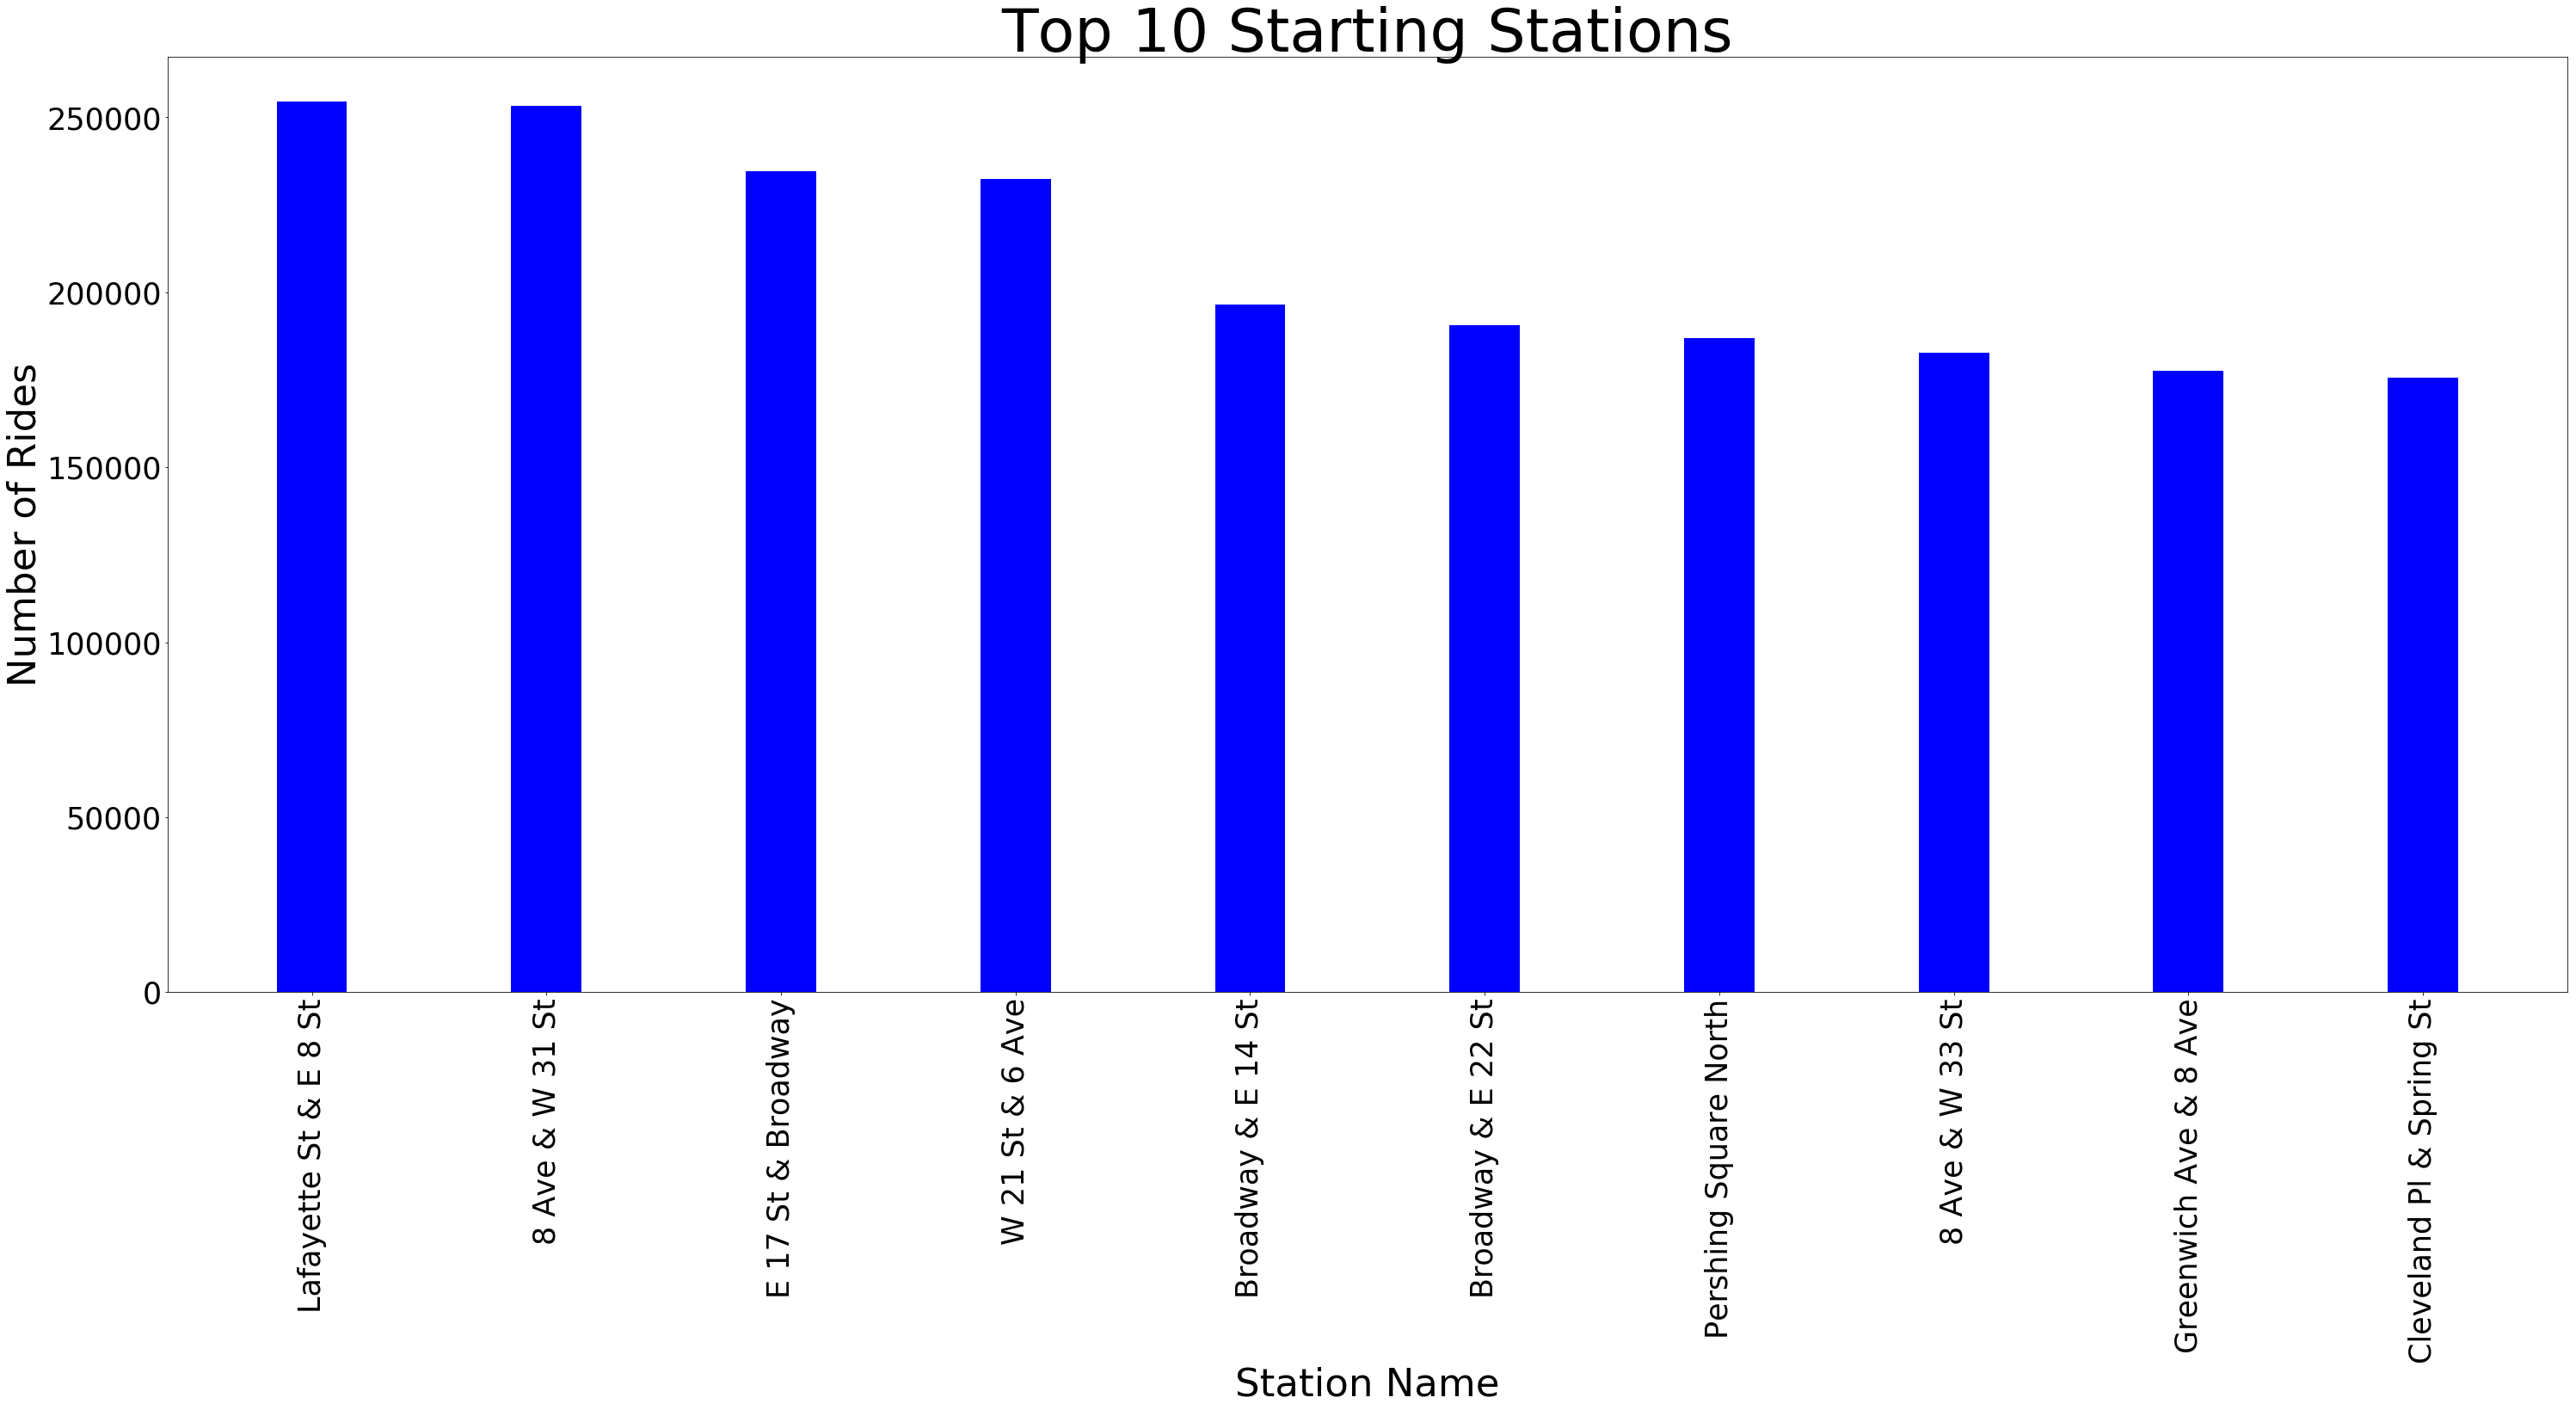

In [5]:
import matplotlib.pyplot as plt
start_stations_list =  [] 
counts_list_starts = []

for x in range(0, len(top_10_starts_graph)):
    temp = top_10_starts_graph['Station Name'][x]
    temp1 = top_10_starts_graph['Counts'][x]
    temp = temp.strip("'")
    temp = temp.strip(" ")
    temp = temp.strip("'")
    start_stations_list.append(temp)
    counts_list_starts.append(temp1)
#counts_collect_y = days_graph.iloc[:,1:].values

N = len(counts_list_starts)
x = range(N)
plt.figure(figsize=(50,20))
plt.title("Top 10 Starting Stations",fontsize=70)
plt.bar(x, counts_list_starts, color="b", align="center",width=0.3)
plt.xticks(range(len(start_stations_list)),start_stations_list[0:],rotation='vertical',fontsize=35)
plt.yticks(fontsize=35)
plt.ylabel("Number of Rides",fontsize=45) 
plt.xlabel("Station Name", fontsize = 45) 
plt.savefig('top_10_starts',bbox_inches= 'tight') 
plt.show()

Visualizing Top 10 Subscriber End Stations

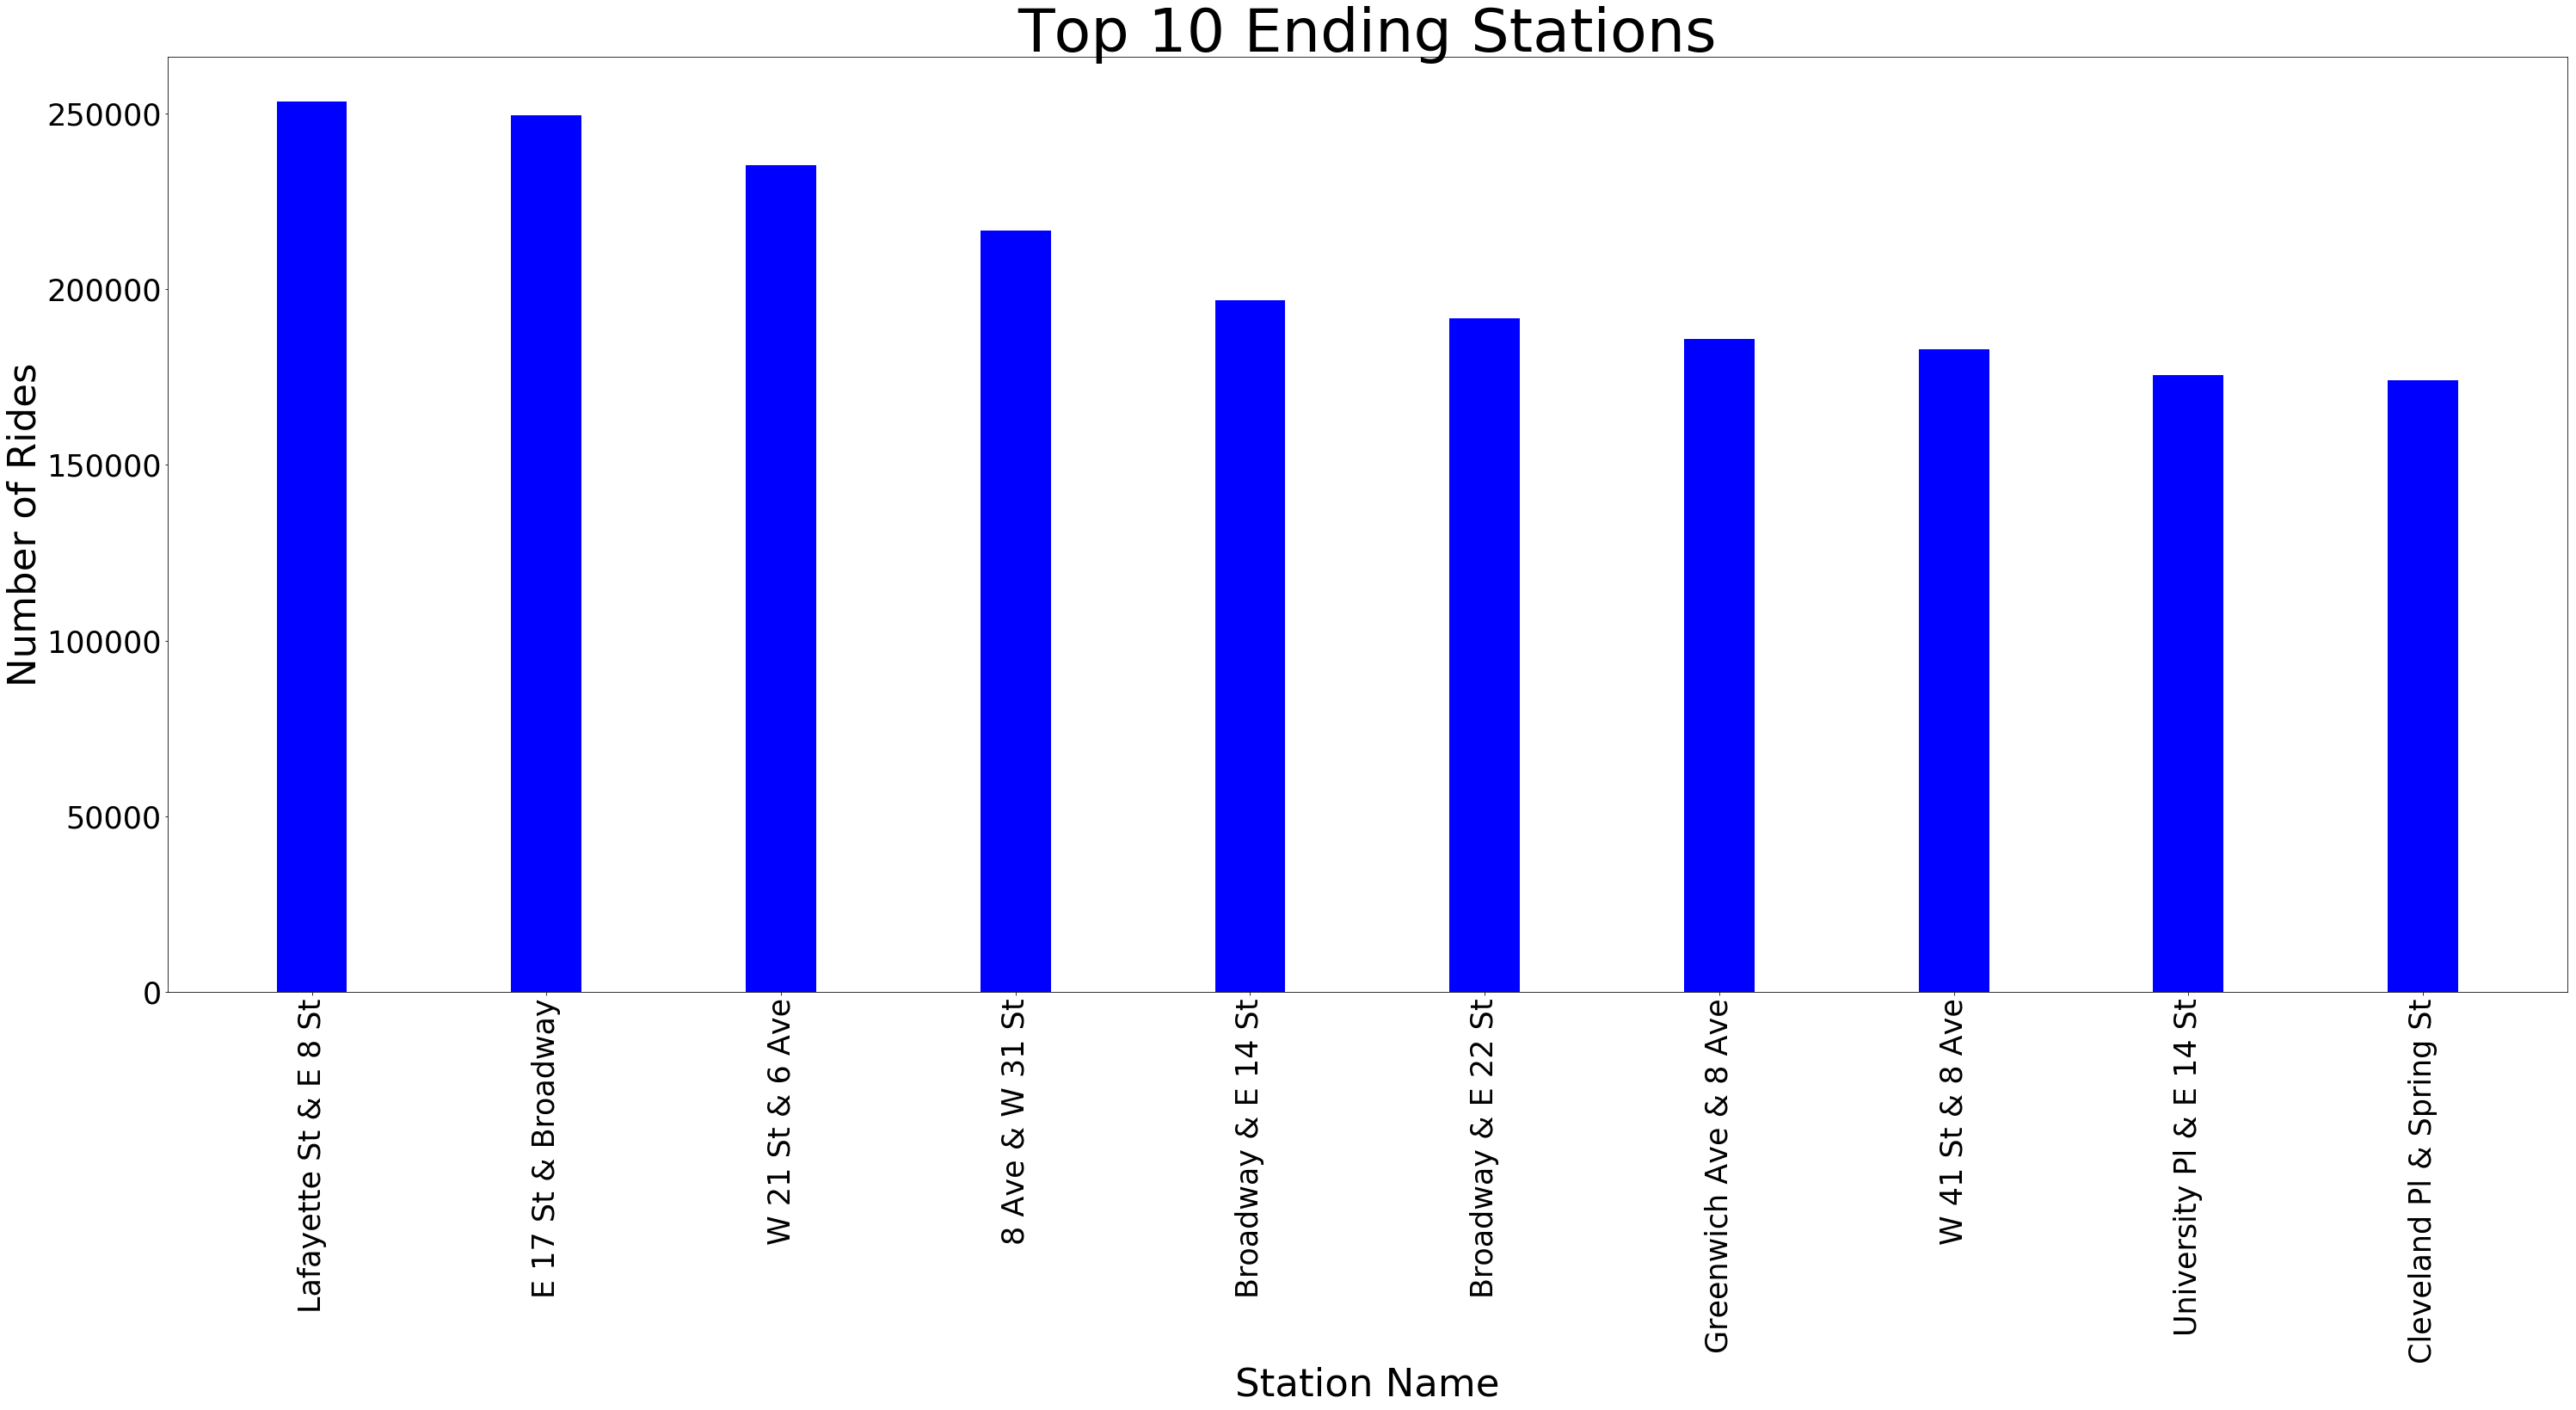

In [6]:
import matplotlib.pyplot as plt
end_stations_list =  [] 
counts_list_ends = []

for x in range(0, len(top_10_ends_graph)):
    temp = top_10_ends_graph['Station Name'][x]
    temp1 = top_10_ends_graph['Counts'][x]
    temp = temp.strip("'")
    temp = temp.strip(" ")
    temp = temp.strip("'")
    end_stations_list.append(temp)
    counts_list_ends.append(temp1)
#counts_collect_y = days_graph.iloc[:,1:].values

N = len(counts_list_ends)
x = range(N)
plt.figure(figsize=(50,20))
plt.title("Top 10 Ending Stations",fontsize=70)
plt.bar(x, counts_list_ends, color="b", align="center",width=0.3)
plt.xticks(range(len(end_stations_list)),end_stations_list[0:],rotation='vertical',fontsize=35)
plt.yticks(fontsize=35)
plt.ylabel("Number of Rides",fontsize=45) 
plt.xlabel("Station Name", fontsize = 45) 
plt.savefig('top_10_ends',bbox_inches= 'tight') 
plt.show()

Mapping  Lat Longs to  NYC Neighborhood Zones

In [ ]:
# import csv
# import pandas as pd
# import numpy as np
# import geopandas as gpd
# import pandas as pd
# import rtree
# from shapely.geometry import Point
# citi_data_zones =pd.read_csv('master_data_file.csv', nrows = 1000)

# zones = gpd.read_file('taxi_zones.shp').to_crs({'init' :'epsg:4326'})
# zones['zone'] = zones.zone.astype('category')
# zones['borough'] = zones.borough.astype('category')
# zones.head()
 
# # subset = citi_data_zones[['start station longitude','start station latitude']][:20] #Test a small sample
# # geometry = [Point(xy) for xy in zip(subset.pickup_longitude, subset.pickup_latitude)]
# # gf = subset.set_geometry(geometry, crs={'init' :'epsg:4326'})

# # gf2 = gpd.sjoin(gf, zones, how="inner") 

In [ ]:
# hjs \
# -files /home/bb1976/project/gender_duration \
# -D mapreduce.job.reduces=1 \
# -mapper gender_duration/map.py \
# -reducer gender_duration/reduce.py \
# -input /user/bb1976/master_data_file.csv \
# -output /user/bb1976/gender_duration.out

hjs \
-files /home/bb1976/project/top_10_ends_sub \
-D mapreduce.job.reduces=1 \
-mapper top_10_ends_sub/mapper.sh \
-reducer top_10_ends_sub/reducer.sh \
-input /user/bb1976/master_data_file.csv \
-output /user/bb1976/top_10_ends_sub.out

. /etc/profile.d/modules.sh
module load python/gnu/3.4.4
directoryXXX/map.py
